In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv("Data/drugsComTrain_raw.tsv", sep = "\t")
df.head()

Unnamed: 0                  drugName                     condition  \
0      206461                 Valsartan  Left Ventricular Dysfunction   
1       95260                Guanfacine                          ADHD   
2       92703                    Lybrel                 Birth Control   
3      138000                Ortho Evra                 Birth Control   
4       35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating  \
0  "It has no side effect, I take it in combinati...     9.0   
1  "My son is halfway through his fourth week of ...     8.0   
2  "I used to take another oral contraceptive, wh...     5.0   
3  "This is my first time using any form of birth...     8.0   
4  "Suboxone has completely turned my life around...     9.0   

                date  usefulCount  
0       May 20, 2012           27  
1     April 27, 2010          192  
2  December 14, 2009           17  
3   November 3, 2015           10  
4  November 27, 2016           37

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   161297 non-null  int64  
 1   drugName     161297 non-null  object 
 2   condition    160398 non-null  object 
 3   review       161297 non-null  object 
 4   rating       161297 non-null  float64
 5   date         161297 non-null  object 
 6   usefulCount  161297 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 8.6+ MB


In [5]:
df.isnull().sum()

Unnamed: 0       0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [6]:
df.condition.value_counts()

Birth Control                                                          28788
Depression                                                              9069
Pain                                                                    6145
Anxiety                                                                 5904
Acne                                                                    5588
Bipolar Disorde                                                         4224
Insomnia                                                                3673
Weight Loss                                                             3609
Obesity                                                                 3568
ADHD                                                                    3383
Diabetes, Type 2                                                        2554
Emergency Contraception                                                 2463
High Blood Pressure                                                     2321

In [7]:
# Just select the first 10 most conditions for the prediction
df2 = df[(df.condition == 'Birth Control') | (df.condition == 'Depression') | (df.condition == 'Pain') 
         | (df.condition == 'Anxiety') | (df.condition == 'Acne') | (df.condition == 'Bipolar Disorde') 
         | (df.condition == 'Insomnia') | (df.condition == 'Diabetes, Type 2') 
         | (df.condition == 'Obesity') | (df.condition == 'High Blood Pressure') ]

In [8]:
df.shape

(161297, 7)

In [9]:
df2.shape

(71834, 7)

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71834 entries, 2 to 161291
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   71834 non-null  int64  
 1   drugName     71834 non-null  object 
 2   condition    71834 non-null  object 
 3   review       71834 non-null  object 
 4   rating       71834 non-null  float64
 5   date         71834 non-null  object 
 6   usefulCount  71834 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 4.4+ MB


In [11]:
# Only the columns "condition" and "Review" are needed the remaining features have to be removed:
df_train = df2.drop(["Unnamed: 0","drugName", "rating", "date", "usefulCount"], axis = 1)

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71834 entries, 2 to 161291
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   condition  71834 non-null  object
 1   review     71834 non-null  object
dtypes: object(2)
memory usage: 1.6+ MB


In [13]:
df_train.condition.value_counts()

Birth Control          28788
Depression              9069
Pain                    6145
Anxiety                 5904
Acne                    5588
Bipolar Disorde         4224
Insomnia                3673
Obesity                 3568
Diabetes, Type 2        2554
High Blood Pressure     2321
Name: condition, dtype: int64

In [14]:
df_train.head()

condition                                             review
2     Birth Control  "I used to take another oral contraceptive, wh...
3     Birth Control  "This is my first time using any form of birth...
7   Bipolar Disorde  "Abilify changed my life. There is hope. I was...
9     Birth Control  "I had been on the pill for many years. When m...
11       Depression  "I have taken anti-depressants for years, with...

In [17]:
# Split the dataframe to analyse each condition individually

df_train_birth= df_train[df_train.condition == "Birth Control"]
df_train_dep = df_train[df_train.condition == "Depression"]
df_train_pain = df_train[df_train.condition == "Pain"]
df_train_anxiety = df_train[df_train.condition == "Anxiety"]
df_train_acne = df_train[df_train.condition == "Acne"]
df_train_bip = df_train[df_train.condition == "Bipolar Disorde"]
df_train_insomnia = df_train[df_train.condition == "Insomnia"]
df_train_obesity = df_train[df_train.condition == "Obesity"]
df_train_diab = df_train[df_train.condition == "Diabetes, Type 2"]
df_train_hbp = df_train[df_train.condition == "High Blood Pressure"]


In [18]:
# show the most frenquently used words on reviews that describe a condition. 
# The Package "Wordcloud" can be used 
from wordcloud import WordCloud

(-0.5, 999.5, 599.5, -0.5)

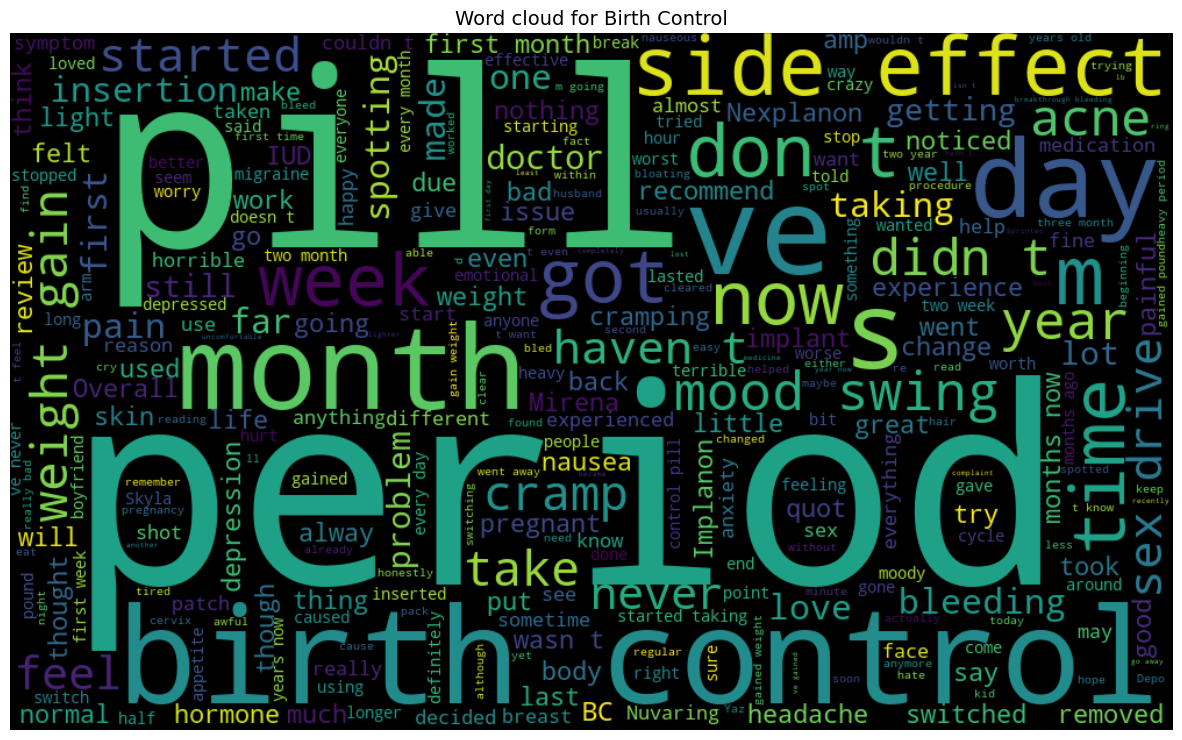

In [19]:
# World cloud for Birth Control
plt.figure(figsize=(15,15))
word_cloud = WordCloud(max_words=300, width=1000, height=600).generate(''.join(df_train_birth.review))
plt.imshow(word_cloud, interpolation='bilinear')
plt.title("Word cloud for Birth Control", fontsize = 14)
plt.axis('off')

(-0.5, 999.5, 599.5, -0.5)

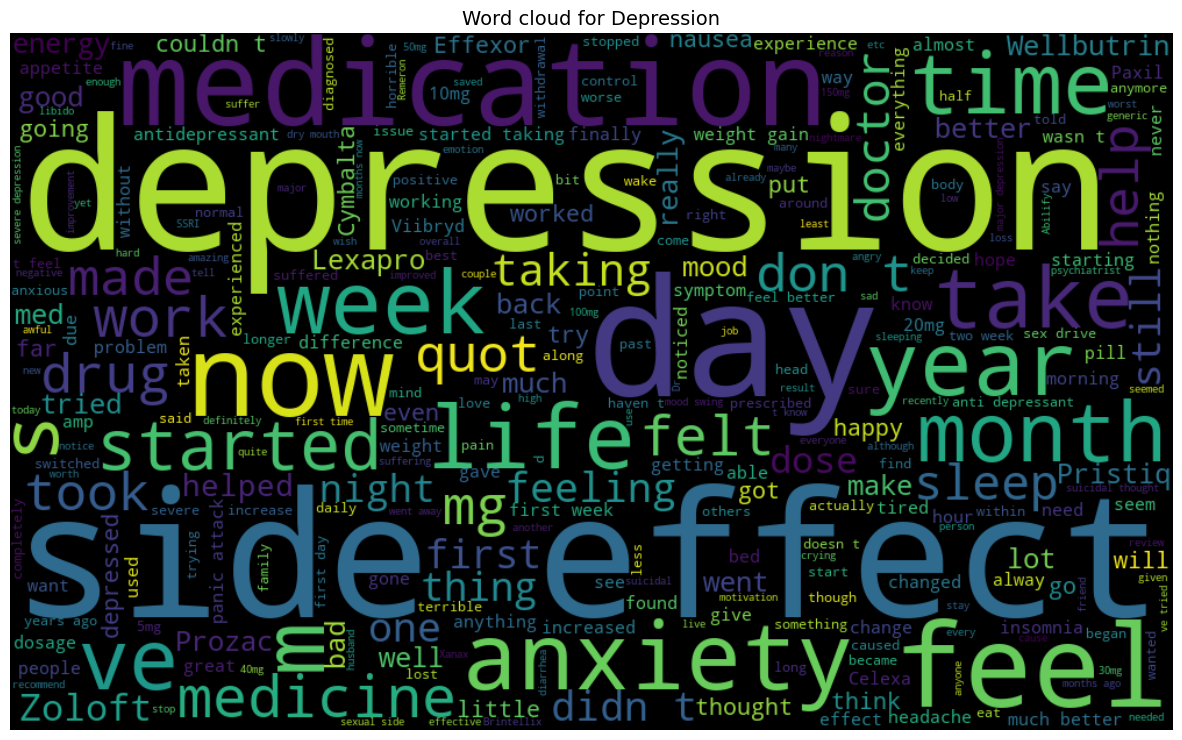

In [20]:
# World cloud for Depression
plt.figure(figsize=(15,15))
word_cloud = WordCloud(max_words=300, width=1000, height=600).generate(''.join(df_train_dep.review))
plt.imshow(word_cloud, interpolation='bilinear')
plt.title("Word cloud for Depression", fontsize = 14)
plt.axis('off')

(-0.5, 999.5, 599.5, -0.5)

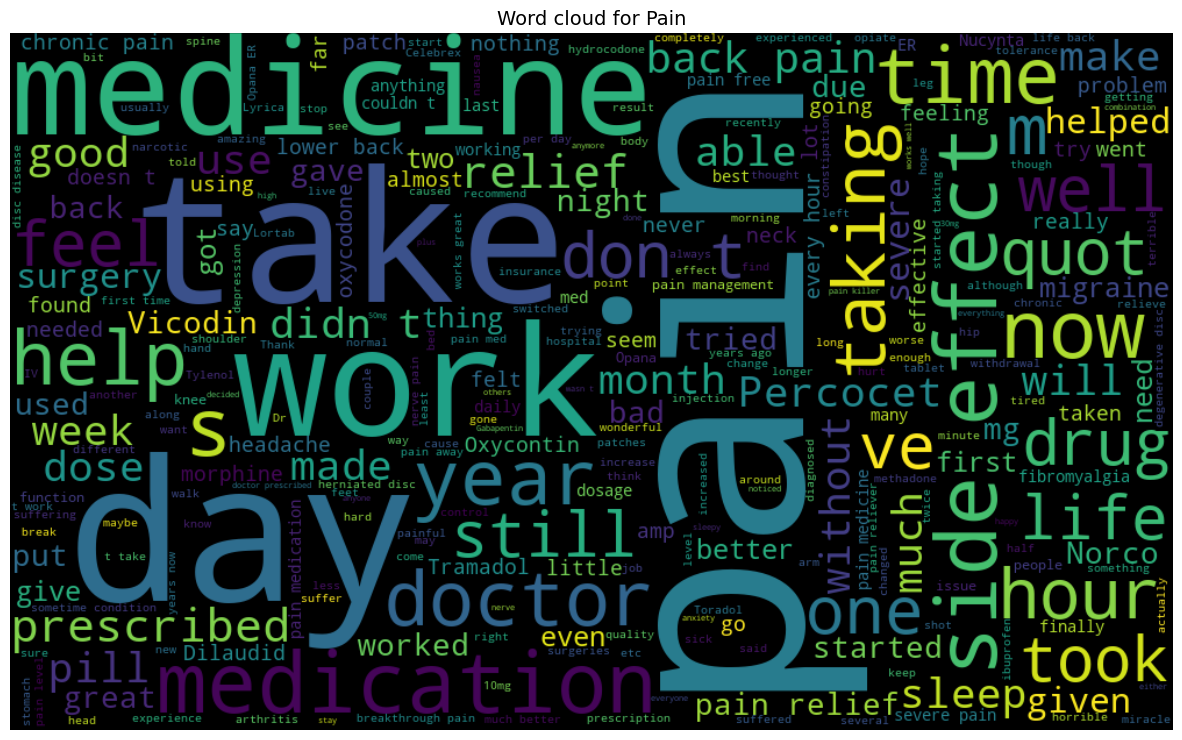

In [21]:
# World cloud for Pain
plt.figure(figsize=(15,15))
word_cloud = WordCloud(max_words=300, width=1000, height=600).generate(''.join(df_train_pain.review))
plt.imshow(word_cloud, interpolation='bilinear')
plt.title("Word cloud for Pain", fontsize = 14)
plt.axis('off')

(-0.5, 999.5, 599.5, -0.5)

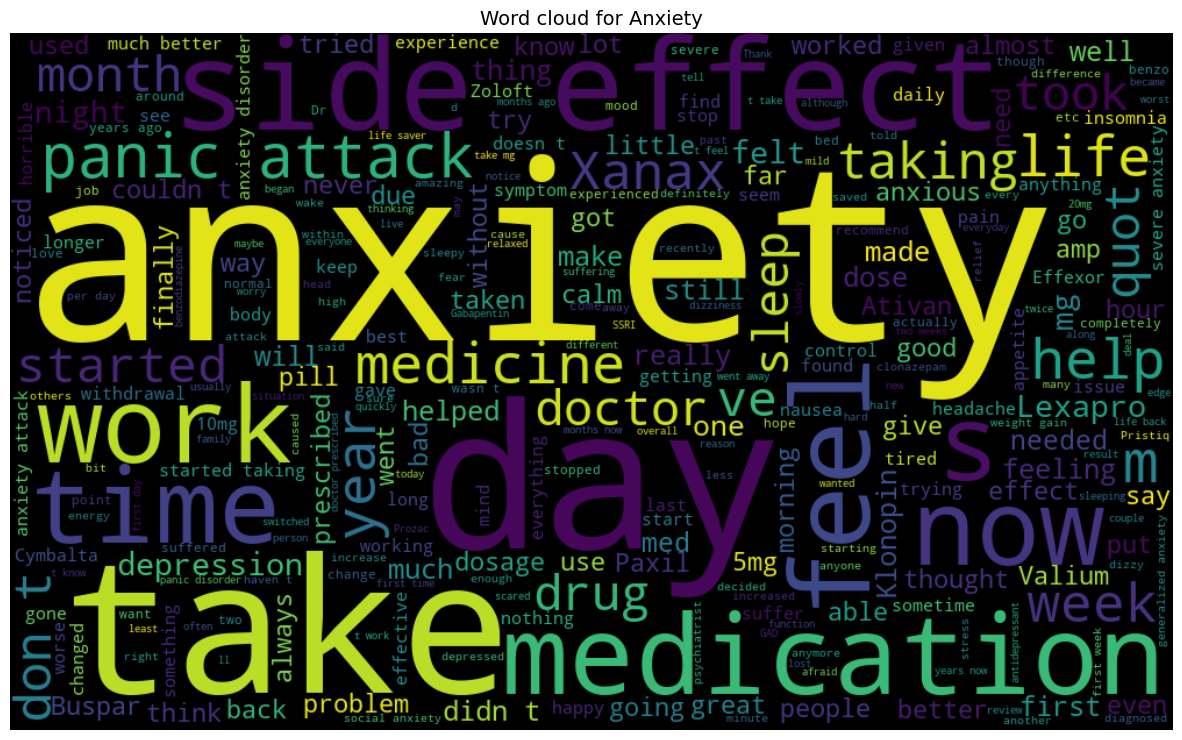

In [22]:
# World cloud for Anxiety
plt.figure(figsize=(15,15))
word_cloud = WordCloud(max_words=300, width=1000, height=600).generate(''.join(df_train_anxiety.review))
plt.imshow(word_cloud, interpolation='bilinear')
plt.title("Word cloud for Anxiety", fontsize = 14)
plt.axis('off')

(-0.5, 999.5, 599.5, -0.5)

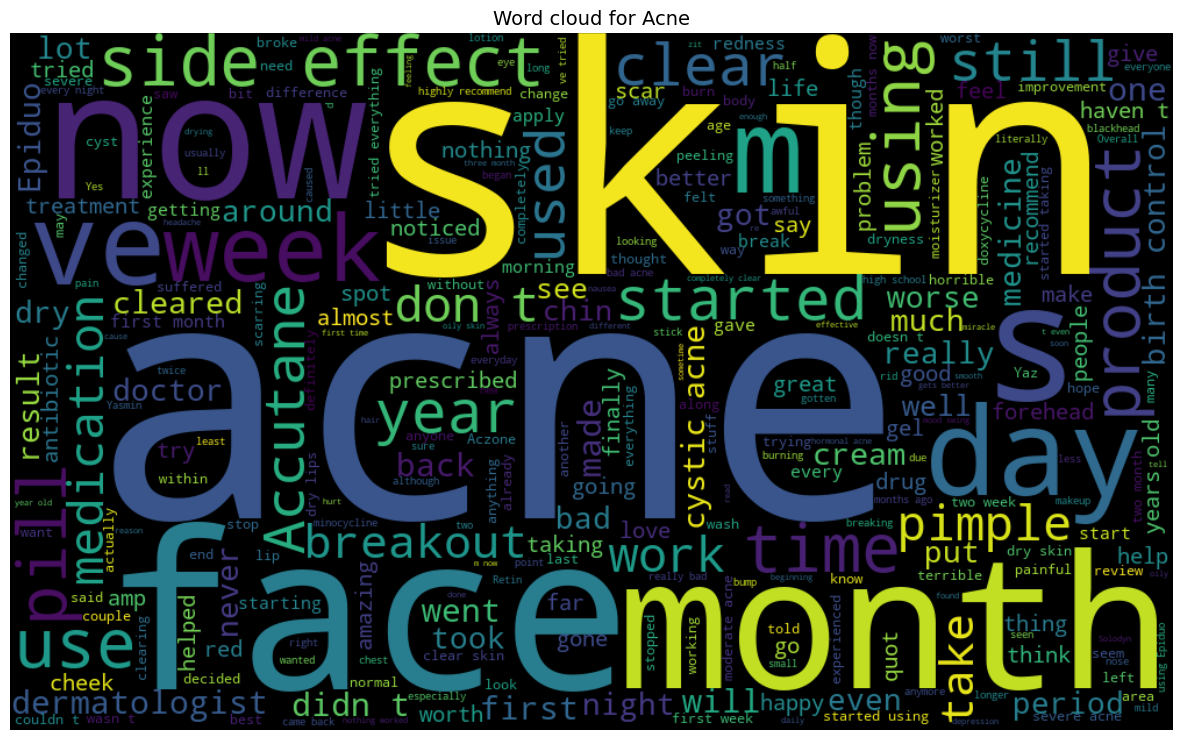

In [23]:
# World cloud for Acne
plt.figure(figsize=(15,15))
word_cloud = WordCloud(max_words=300, width=1000, height=600).generate(''.join(df_train_acne.review))
plt.imshow(word_cloud, interpolation='bilinear')
plt.title("Word cloud for Acne", fontsize = 14)
plt.axis('off')

(-0.5, 999.5, 599.5, -0.5)

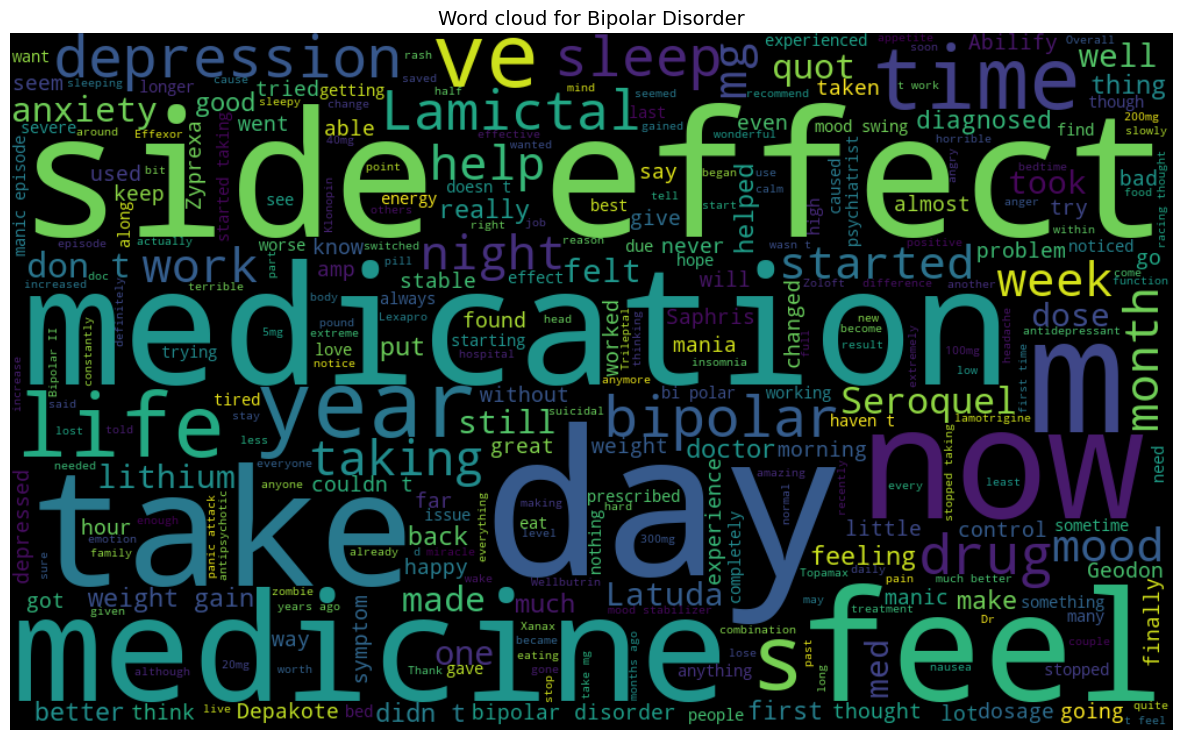

In [24]:
# World cloud for Bipolar Disorder
plt.figure(figsize=(15,15))
word_cloud = WordCloud(max_words=300, width=1000, height=600).generate(''.join(df_train_bip.review))
plt.imshow(word_cloud, interpolation='bilinear')
plt.title("Word cloud for Bipolar Disorder", fontsize = 14)
plt.axis('off')

(-0.5, 999.5, 599.5, -0.5)

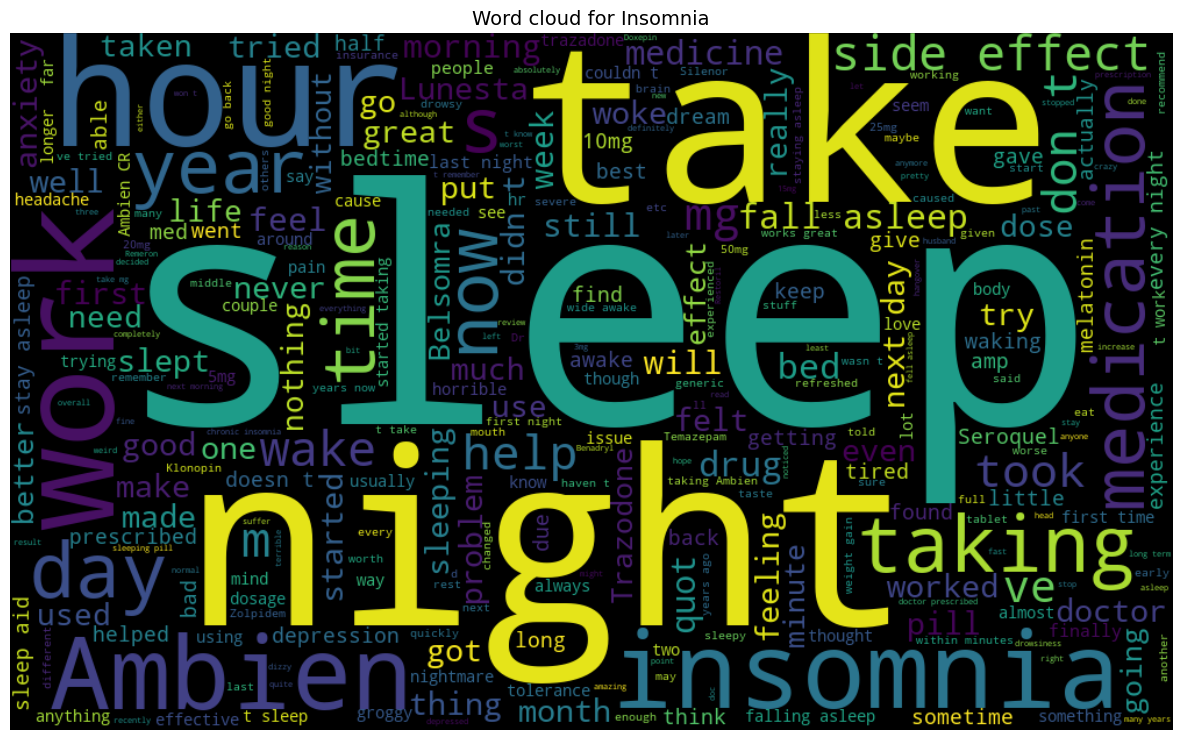

In [25]:
# World cloud for Insomnia
plt.figure(figsize=(15,15))
word_cloud = WordCloud(max_words=300, width=1000, height=600).generate(''.join(df_train_insomnia.review))
plt.imshow(word_cloud, interpolation='bilinear')
plt.title("Word cloud for Insomnia", fontsize = 14)
plt.axis('off')

(-0.5, 999.5, 599.5, -0.5)

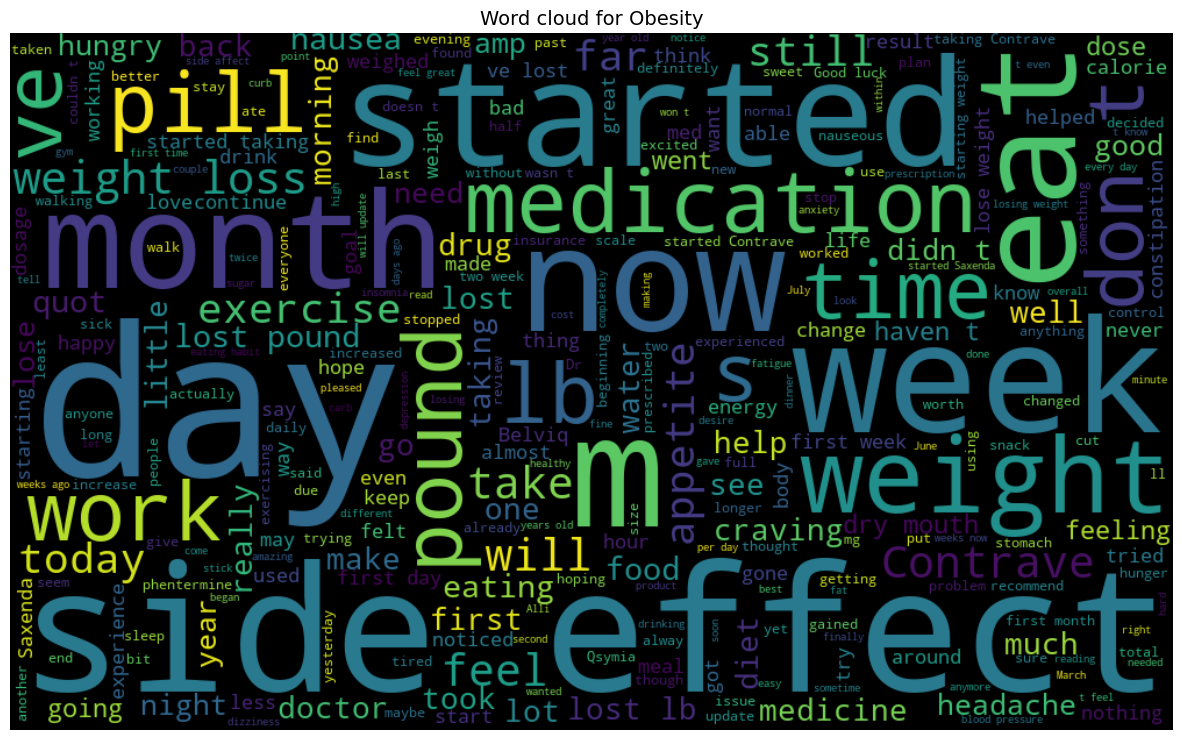

In [26]:
# World cloud for Obesity
plt.figure(figsize=(15,15))
word_cloud = WordCloud(max_words=300, width=1000, height=600).generate(''.join(df_train_obesity.review))
plt.imshow(word_cloud, interpolation='bilinear')
plt.title("Word cloud for Obesity", fontsize = 14)
plt.axis('off')

(-0.5, 999.5, 599.5, -0.5)

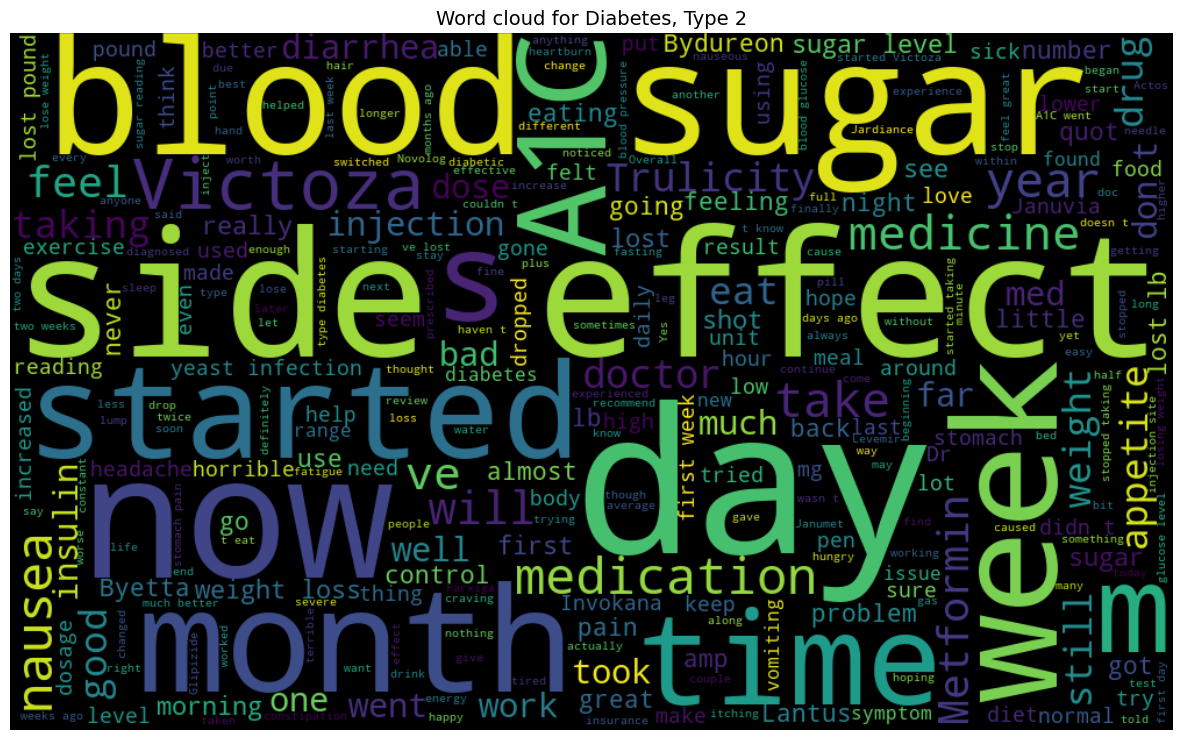

In [27]:
# World cloud for Diabetes, Type 2
plt.figure(figsize=(15,15))
word_cloud = WordCloud(max_words=300, width=1000, height=600).generate(''.join(df_train_diab.review))
plt.imshow(word_cloud, interpolation='bilinear')
plt.title("Word cloud for Diabetes, Type 2", fontsize = 14)
plt.axis('off')

(-0.5, 999.5, 599.5, -0.5)

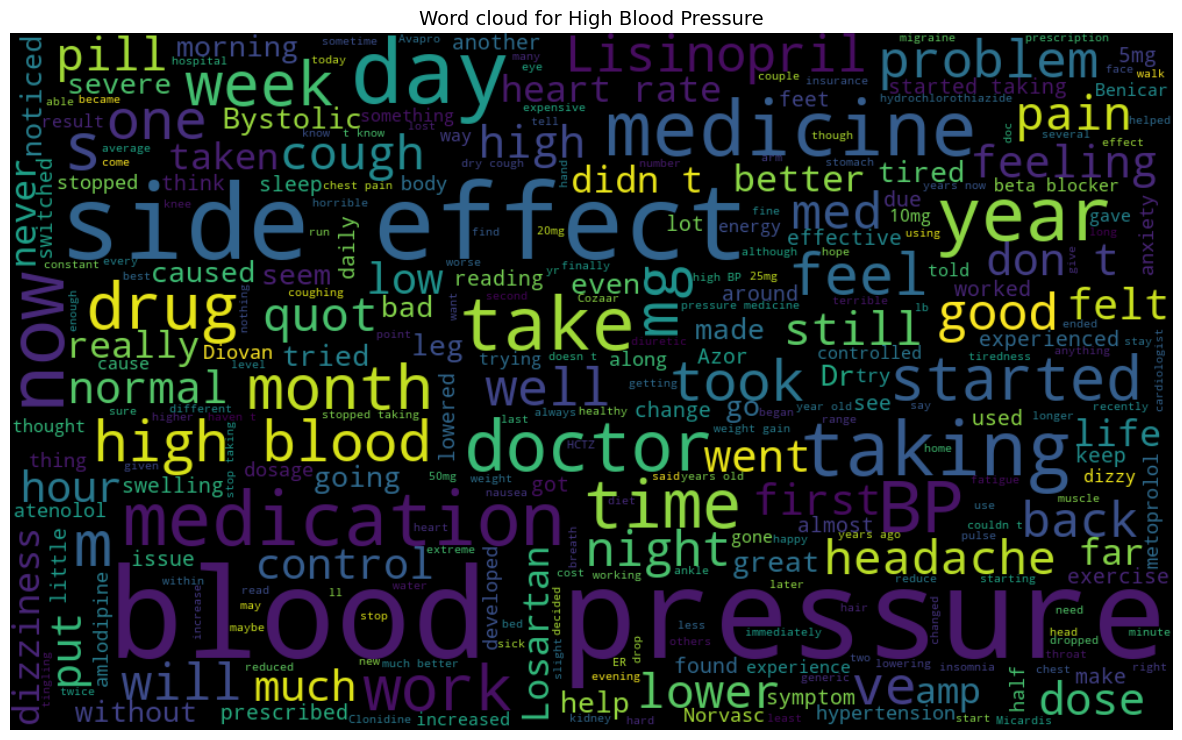

In [28]:
# World cloud for High Blood Pressure
plt.figure(figsize=(15,15))
word_cloud = WordCloud(max_words=300, width=1000, height=600).generate(''.join(df_train_hbp.review))
plt.imshow(word_cloud, interpolation='bilinear')
plt.title("Word cloud for High Blood Pressure", fontsize = 14)
plt.axis('off')

### Data Preprocessing

In [15]:
# Show some reviews
df_train.review[3]

'"This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch"'

In [16]:
df_train.review[7]

'"Abilify changed my life. There is hope. I was on Zoloft and Clonidine when I first started Abilify at the age of 15.. Zoloft for depression and Clondine to manage my complete rage. My moods were out of control. I was depressed and hopeless one second and then mean, irrational, and full of rage the next. My Dr. prescribed me 2mg of Abilify and from that point on I feel like I have been cured though I know I&#039;m not.. Bi-polar disorder is a constant battle. I know Abilify works for me because I have tried to get off it and lost complete control over my emotions. Went back on it and I was golden again.  I am on 5mg 2x daily. I am now 21 and better than I have ever been in the past. Only side effect is I like to eat a lot."'

In [17]:
# Remove the douböe quotes
df_train["review"] = df_train["review"].str.replace('"', '')

In [18]:
pd.set_option('max_colwidth', -1)
df_train.head()

C:\Users\49176\anaconda3\envs\nlp\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


condition  \
2   Birth Control     
3   Birth Control     
7   Bipolar Disorde   
9   Birth Control     
11  Depression        

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 review  
2   I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas.  
3   This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch                                                                                                                                                                                                                                                                                                                       
7   Abilify changed my life. There is hope. I was on Zoloft and Clonidine when I first started Abilify at the age of 15.. Zoloft for depression and Clondine to manage my complete rage. My moods were out of control. I was depressed and hopeless one second and then mean, irrational, and full of rage the next. My Dr. prescribed me 2mg of Abilify and from that point on I feel like I have been cured though I know I&#039;m not.. Bi-polar disorder is a constant battle. I know Abilify works for me because I have tried to get off it and lost complete control over my emotions. Went back on it and I was golden again.  I am on 5mg 2x daily. I am now 21 and better than I have ever been in the past. Only side effect is I like to eat a lot.                          
9   I had been on the pill for many years. When my doctor changed my RX to chateal, it was as effective. It really did help me by completely clearing my acne, this takes about 6 months though. I did not gain extra weight, or develop any emotional health issues. I stopped taking it bc I started using a more natural method of birth control, but started to take it bc I hate that my acne came back at age 28. I really hope symptoms like depression, or weight gain do not begin to affect me as I am older now. I&#039;m also naturally moody, so this may worsen things. I was in a negative mental rut today. Also I hope this doesn&#039;t push me over the edge, as I believe I am depressed. Hopefully it&#039;ll be just like when I was younger.                      
11  I have taken anti-depressants for years, with some improv

In [19]:
# Remove the stopwords: the most common words in any natural language. Exple in English: "the"; "to", "at", "when", "is"...
# All these words are not important for the prediction
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\49176\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [21]:
# hier are the stopwords in english
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [22]:
# LEMMATIZATION: A jargon.
# Lemmatization is the process of converting a word to its base form. The difference between stemming and lemmatization is, lemmatization considers the context and converts the word to its meaningful base form, whereas stemming just removes the last few characters, often leading to incorrect meanings and spelling errors.

from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

In [23]:
# remove html characters that may have been grabbed (caught) during web scraping 
from bs4 import BeautifulSoup

# For substituting values import re
import re

In [24]:
# Now write a Funtion to cleaning up the sentences (reviews)

def clean_review(raw_review):
    # 1. Clean up html characters
    html_removed = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. make spaces where all the non-letters (special characters or numbers) are present. All these characters are replaced with spaces:
    letters_only = re.sub('[^a-zA-Z]', ' ', html_removed )
    # 3. Lower the letters so that all the letters are uniform
    letters_low= letters_only.lower().split()
    # 4. Remove the stopwords
    important_words = [word for word in letters_low if not word in stop_words]
    # 5. Lemmatization
    lemmatize_words = [lemmatizer.lemmatize(word) for word in important_words]
    # 6. join words and separate them with space
    return (' '.join(lemmatize_words))
    

In [27]:
df_train['cleaned_reviews'] = df_train.review.apply(clean_review)

In [28]:
df_train.head()

condition  \
2   Birth Control     
3   Birth Control     
7   Bipolar Disorde   
9   Birth Control     
11  Depression        

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 review  \
2   I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas.   
3   This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch                                                                                                                                                                                                                                                                                                                        
7   Abilify changed my life. There is hope. I was on Zoloft and Clonidine when I first started Abilify at the age of 15.. Zoloft for depression and Clondine to manage my complete rage. My moods were out of control. I was depressed and hopeless one second and then mean, irrational, and full of rage the next. My Dr. prescribed me 2mg of Abilify and from that point on I feel like I have been cured though I know I&#039;m not.. Bi-polar disorder is a constant battle. I know Abilify works for me because I have tried to get off it and lost complete control over my emotions. Went back on it and I was golden again.  I am on 5mg 2x daily. I am now 21 and better than I have ever been in the past. Only side effect is I like to eat a lot.                           
9   I had been on the pill for many years. When my doctor changed my RX to chateal, it was as effective. It really did help me by completely clearing my acne, this takes about 6 months though. I did not gain extra weight, or develop any emotional health issues. I stopped taking it bc I started using a more natural method of birth control, but started to take it bc I hate that my acne came back at age 28. I really hope symptoms like depression, or weight gain do not begin to affect me as I am older now. I&#039;m also naturally moody, so this may worsen things. I was in a negative mental rut today. Also I hope this doesn&#039;t push me over the edge, as I believe I am depressed. Hopefully it&#039;ll be just like when I was younger.                       
11  I have taken anti-depressants for years, with some i

### Model preparation

In [29]:
# Creating features and target variable x,y

x = df_train.cleaned_reviews
y = df_train.condition

In [30]:
# split the data into train-test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=48)

In [31]:
# Machine learning algorithms cannot work with raw text directly; the text must be converted into numbers. Specifically, vectors of numbers.
# A popular and simple method of feature extraction (conversion into numbers) with text data is called the bag-of-words model of text.
# Another popular method is TF-IDF

# Bag of Words just creates a set of vectors containing the count of word occurrences in the document (reviews), while the TF-IDF model contains information on the more important words and the less important ones as well.
# Bag of Words vectors are easy to interpret. However, TF-IDF usually performs better in machine learning models.

# Bag of words:
from sklearn.feature_extraction.text import CountVectorizer
bag_of_word_vectorizer = CountVectorizer(stop_words='english')
bOw_train = bag_of_word_vectorizer.fit_transform(x_train)
bOw_test = bag_of_word_vectorizer.transform(x_test)


# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train = tfidf_vectorizer.fit_transform(x_train)
tfidf_test = tfidf_vectorizer.transform(x_test)

### ML Model: Naive bayes

In [32]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# Try to train Naive bayes with bag of words vectorizer
nb_classifier = MultinomialNB()
nb_classifier.fit(bOw_train, y_train)

# Prediction on test set
nb_bOw_pred = nb_classifier.predict(bOw_test)
score_nb_bOw = metrics.accuracy_score(y_test, nb_bOw_pred)
print("Accuracy: %0.3f" % score_nb_bOw)

Accuracy: 0.881


In [33]:
# Confusion matrix for multiple class classification

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization


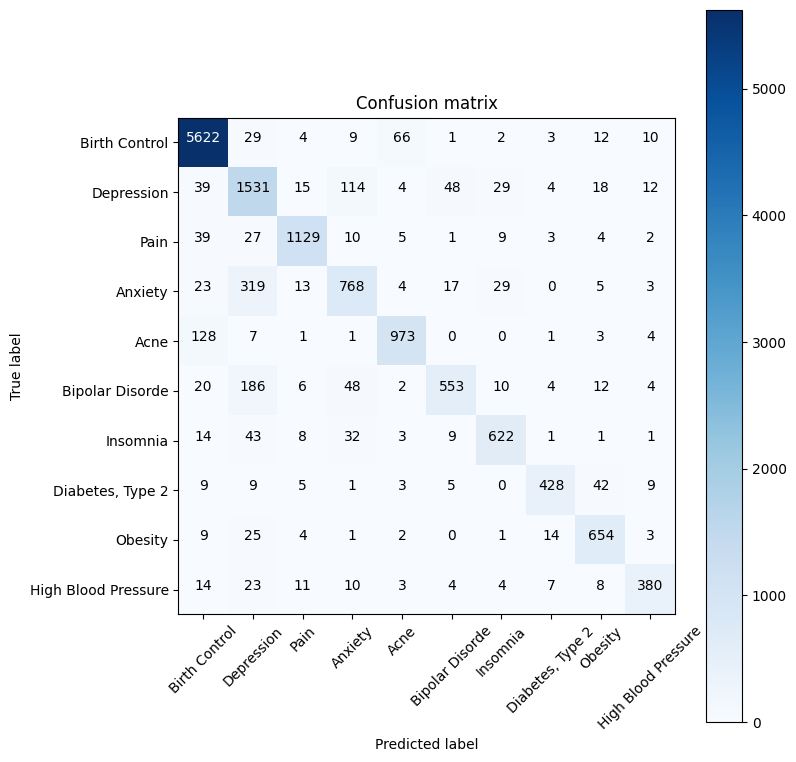

In [34]:
# Confusion matrix for the prediction of the bayes model with bag of word vectozizer:
cm_nb_bOw = metrics.confusion_matrix(y_test, nb_bOw_pred, labels=['Birth Control', 'Depression', 'Pain', 'Anxiety', 'Acne', 'Bipolar Disorde',
                                                                 'Insomnia', 'Diabetes, Type 2', 'Obesity', 'High Blood Pressure'])

plt.figure(figsize=(8,8))
plot_confusion_matrix(cm_nb_bOw , classes= ['Birth Control', 'Depression', 'Pain', 'Anxiety', 'Acne', 'Bipolar Disorde',
                                                                 'Insomnia', 'Diabetes, Type 2', 'Obesity', 'High Blood Pressure'])

Accuracy: 0.756
Confusion matrix, without normalization


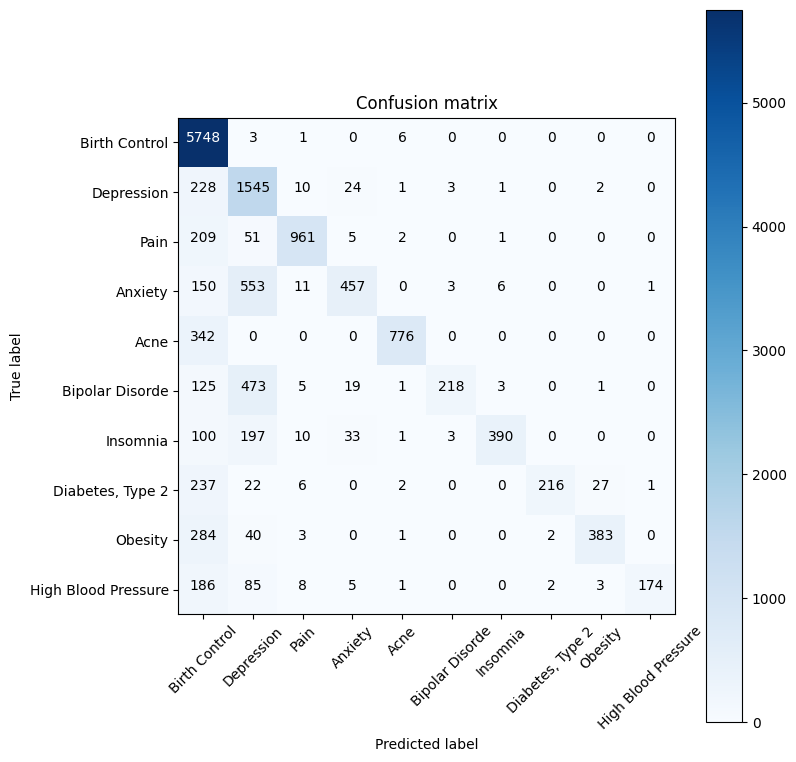

In [35]:
# Try to train Naive bayes with TF-IDF vectorizer
nb_classifier = MultinomialNB()
nb_classifier.fit(tfidf_train, y_train)

# Prediction on test set
tfidf_pred = nb_classifier.predict(tfidf_test)
score_tfidf = metrics.accuracy_score(y_test, tfidf_pred)
print("Accuracy: %0.3f" % score_tfidf)

cm_tfidf = metrics.confusion_matrix(y_test, tfidf_pred, labels=['Birth Control', 'Depression', 'Pain', 'Anxiety', 'Acne', 'Bipolar Disorde',
                                                                 'Insomnia', 'Diabetes, Type 2', 'Obesity', 'High Blood Pressure'])

plt.figure(figsize=(8,8))
plot_confusion_matrix(cm_tfidf , classes= ['Birth Control', 'Depression', 'Pain', 'Anxiety', 'Acne', 'Bipolar Disorde',
                                                                 'Insomnia', 'Diabetes, Type 2', 'Obesity', 'High Blood Pressure'])

### ML Model: Passive aggressive classifier

Accuracy: 0.896
Confusion matrix, without normalization


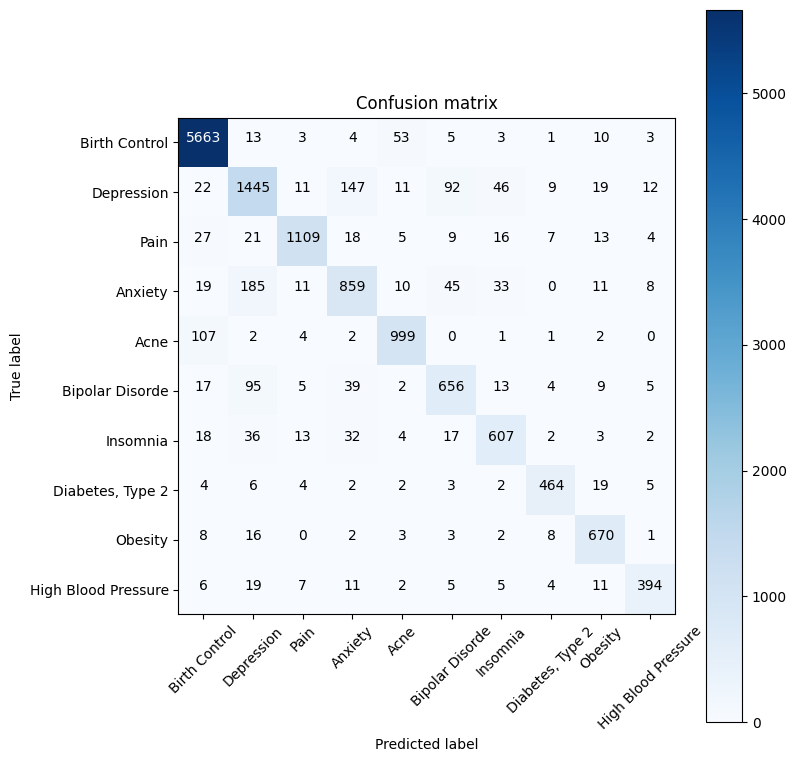

In [36]:
# Try to train passive aggressiv classifier with bag of words vectorizer
from sklearn.linear_model import PassiveAggressiveClassifier

pass_classifier = PassiveAggressiveClassifier()
pass_classifier.fit(bOw_train, y_train)

# Prediction on test set
pass_bOw_pred = pass_classifier.predict(bOw_test)
score_pass_bOw = metrics.accuracy_score(y_test, pass_bOw_pred)
print("Accuracy: %0.3f" % score_pass_bOw)

cm_pass_bOw = metrics.confusion_matrix(y_test, pass_bOw_pred, labels=['Birth Control', 'Depression', 'Pain', 'Anxiety', 'Acne', 'Bipolar Disorde',
                                                                 'Insomnia', 'Diabetes, Type 2', 'Obesity', 'High Blood Pressure'])
plt.figure(figsize=(8,8))
plot_confusion_matrix(cm_pass_bOw , classes= ['Birth Control', 'Depression', 'Pain', 'Anxiety', 'Acne', 'Bipolar Disorde',
                                                                 'Insomnia', 'Diabetes, Type 2', 'Obesity', 'High Blood Pressure'])    

Accuracy: 0.911
Confusion matrix, without normalization


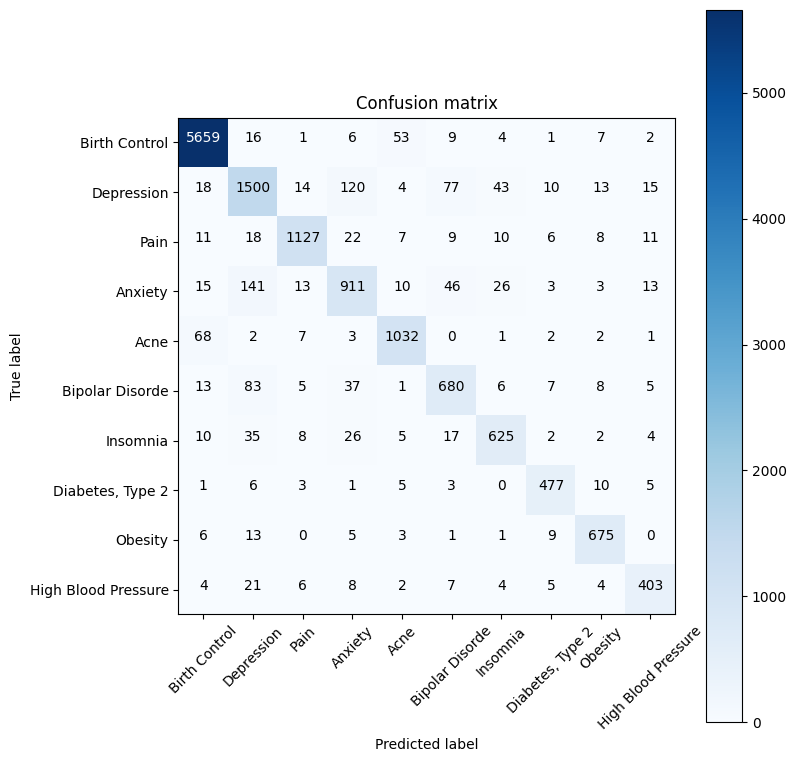

In [37]:
# Try to train passive aggressiv classifier with TF-IDF vectorizer
from sklearn.linear_model import PassiveAggressiveClassifier

pass_classifier = PassiveAggressiveClassifier()
pass_classifier.fit(tfidf_train, y_train)

# Prediction on test set
pass_tfidf_pred = pass_classifier.predict(tfidf_test)
score_pass_tfidf = metrics.accuracy_score(y_test, pass_tfidf_pred)
print("Accuracy: %0.3f" % score_pass_tfidf)

cm_pass_tfidf = metrics.confusion_matrix(y_test, pass_tfidf_pred, labels=['Birth Control', 'Depression', 'Pain', 'Anxiety', 'Acne', 'Bipolar Disorde',
                                                                 'Insomnia', 'Diabetes, Type 2', 'Obesity', 'High Blood Pressure'])
plt.figure(figsize=(8,8))
plot_confusion_matrix(cm_pass_tfidf , classes= ['Birth Control', 'Depression', 'Pain', 'Anxiety', 'Acne', 'Bipolar Disorde',
                                                                 'Insomnia', 'Diabetes, Type 2', 'Obesity', 'High Blood Pressure'])    

In [42]:
# Try ngram (Bigrams) on TF-IDF with pass. aggr. classifier
tfidf_vectorizer2 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,2))
#tfidf_vectorizer2 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,3))
tfidf_train2 = tfidf_vectorizer2.fit_transform(x_train)
tfidf_test2 = tfidf_vectorizer2.transform(x_test)


Accuracy: 0.936
Confusion matrix, without normalization


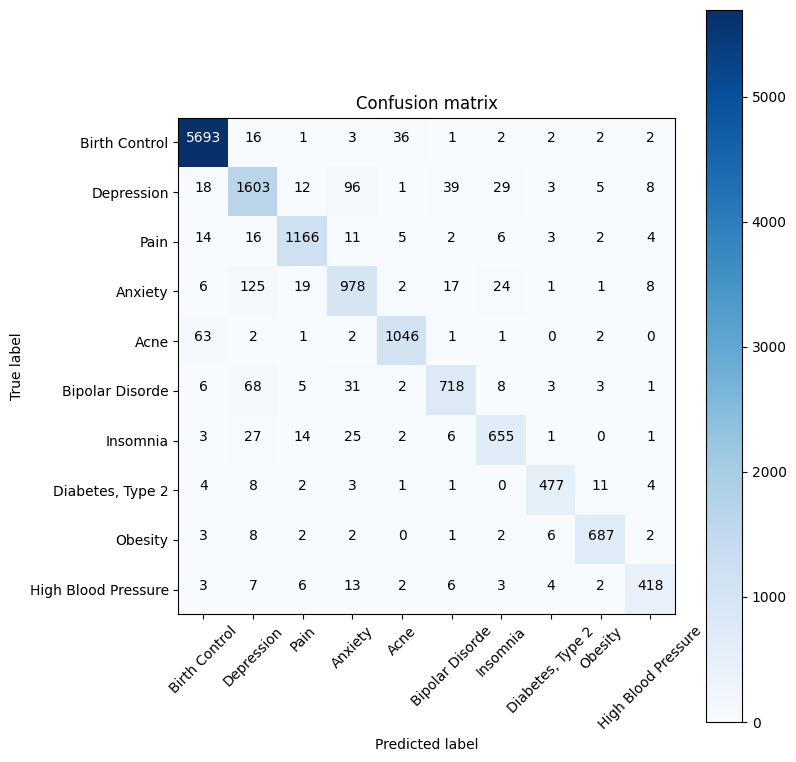

In [43]:
pass_classifier.fit(tfidf_train2, y_train)
# Prediction on test set
pass_tfidf_pred2 = pass_classifier.predict(tfidf_test2)
score_pass_tfidf2 = metrics.accuracy_score(y_test, pass_tfidf_pred2)
print("Accuracy: %0.3f" % score_pass_tfidf2)

cm_pass_tfidf2 = metrics.confusion_matrix(y_test, pass_tfidf_pred2, labels=['Birth Control', 'Depression', 'Pain', 'Anxiety', 'Acne', 'Bipolar Disorde',
                                                                 'Insomnia', 'Diabetes, Type 2', 'Obesity', 'High Blood Pressure'])
plt.figure(figsize=(8,8))
plot_confusion_matrix(cm_pass_tfidf2 , classes= ['Birth Control', 'Depression', 'Pain', 'Anxiety', 'Acne', 'Bipolar Disorde',
                                                                 'Insomnia', 'Diabetes, Type 2', 'Obesity', 'High Blood Pressure'])    

Accuracy: 0.937
Confusion matrix, without normalization


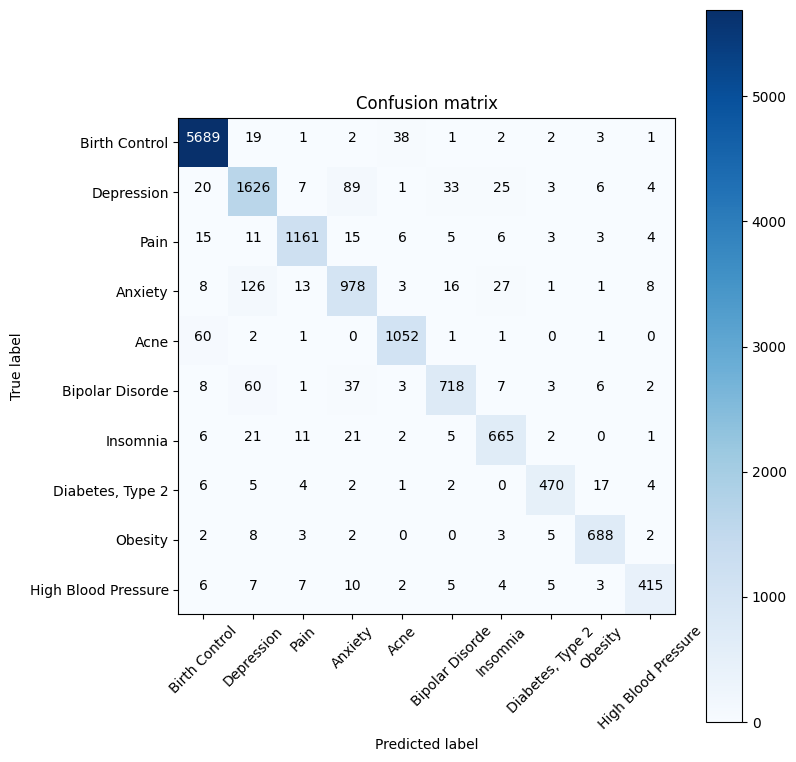

In [47]:
# Try ngram (Trigrams) on TF-IDF with pass. aggr. classifier
tfidf_vectorizer3 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,3))
tfidf_train3 = tfidf_vectorizer3.fit_transform(x_train)
tfidf_test3 = tfidf_vectorizer3.transform(x_test)

pass_classifier.fit(tfidf_train3, y_train)
# Prediction on test set
pass_tfidf_pred3 = pass_classifier.predict(tfidf_test3)
score_pass_tfidf3 = metrics.accuracy_score(y_test, pass_tfidf_pred3)
print("Accuracy: %0.3f" % score_pass_tfidf3)

cm_pass_tfidf3 = metrics.confusion_matrix(y_test, pass_tfidf_pred3, labels=['Birth Control', 'Depression', 'Pain', 'Anxiety', 'Acne', 'Bipolar Disorde',
                                                                 'Insomnia', 'Diabetes, Type 2', 'Obesity', 'High Blood Pressure'])
plt.figure(figsize=(8,8))
plot_confusion_matrix(cm_pass_tfidf3 , classes= ['Birth Control', 'Depression', 'Pain', 'Anxiety', 'Acne', 'Bipolar Disorde',
                                                                 'Insomnia', 'Diabetes, Type 2', 'Obesity', 'High Blood Pressure'])    

### Result: The best classifier is the Passiv aggr. model used with the TF-IDF trigrams vectorizer reaching an accuracy of 93.8%

### Sample prediction test

In [48]:
df_train.tail()

condition  \
161283  Bipolar Disorde       
161286  Depression            
161287  Anxiety               
161290  High Blood Pressure   
161291  Birth Control         

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  review  \
161283  I was in a very bad place at the time I started taking it. My doctor wanted to ween me off of Effexor after 7 years of 300mg of it. I&#039;ll tell you coming off the Effexor is like coming off hard drugs like heroine! I&#039;m not sure if the Zeldox (what they call geodon in Canada) was helping or making it worse. I officially got off the effexor after 10 weeks of weening and I&#039;m still currently on 80mg of Zeldox. I will say you have to eat with this med or else you&#039;re really only giving your body half of what you&#039;re putting in it. I&#039;m a week into lithium at 600mg. I&#039;m feeling fantastic, but I&#039;m thinking about weening off of the Zeldox, I do not believe its being effective and I&#039;m just getting negative side effects from it.   
161286  This is the third med I&#039;ve tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am so dizzy, I have major diarrhea and feel worse than I started. Contacting my doc in the am  and changing asap.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
161287  I was super against taking medication. I&#039;ve started dealing with anxiety (some depression) for awhile now. I got prescribed Ativan months ago, and never took it. I thought I could handle myself again but then my relationship started to fail because of my over thinking. I went back to the doctor, and decided to try it. She prescribed me .50 3 times a day. I took a full one at night after a bad panic attack, and within 30 minutes I was calm and slept through the entire night. I have only been taking a half morning and mid afternoon and full at night because it does make you feel tired. My brain is in a slight fog, but nothing crazy, I still know whats going on though :) Give it a try if you are suffering. You will know after 1.                               
161290  I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations.                                                                                                                                                                                                                                                                                 

In [49]:
# A text for Birth Control. This should predict Birth Control
text = ["This would be my second month on Junel. I&#039;ve been on Birth Control for about 10 years now. I changed due to spotting and increased mood swings with my previous birth control. Since the switch I have had shorter periods about 2-3 days, but I have gained major weight and increased appetite. I switched up my regular exercise routine and still have not managed to drop the extra 7 lbs ;("]

test = tfidf_vectorizer3.transform(text)
pred = pass_classifier.predict(test)[0]
pred

'Birth Control'

In [50]:
# A text for High Blood Pressure. This should predict High Blood Pressure
text2 = ["I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations."]

test2 = tfidf_vectorizer3.transform(text2)
pred2 = pass_classifier.predict(test2)[0]
pred2

'High Blood Pressure'

In [51]:
# A text for Anxiety. This should predict Anxiety.
text3 = ["I was super against taking medication. I&#039;ve started dealing with anxiety (some depression) for awhile now. I got prescribed Ativan months ago, and never took it. I thought I could handle myself again but then my relationship started to fail because of my over thinking. I went back to the doctor, and decided to try it. She prescribed me .50 3 times a day. I took a full one at night after a bad panic attack, and within 30 minutes I was calm and slept through the entire night. I have only been taking a half morning and mid afternoon and full at night because it does make you feel tired. My brain is in a slight fog, but nothing crazy, I still know whats going on though :) Give it a try if you are suffering. You will know after 1."]

test3 = tfidf_vectorizer3.transform(text3)
pred3 = pass_classifier.predict(test3)[0]
pred3

'Anxiety'

In [52]:
# A text for Depression. This should predict Depression.
text4 = ["This is the third med I&#039;ve tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am so dizzy, I have major diarrhea and feel worse than I started. Contacting my doc in the am and changing asap."]

test4 = tfidf_vectorizer3.transform(text4)
pred4 = pass_classifier.predict(test4)[0]
pred4

'Depression'

In [53]:
# A text for bipolar disorder. This should predict bipolar disorder.
text5 = ["I was in a very bad place at the time I started taking it. My doctor wanted to ween me off of Effexor after 7 years of 300mg of it. I&#039;ll tell you coming off the Effexor is like coming off hard drugs like heroine! I&#039;m not sure if the Zeldox (what they call geodon in Canada) was helping or making it worse. I officially got off the effexor after 10 weeks of weening and I&#039;m still currently on 80mg of Zeldox. I will say you have to eat with this med or else you&#039;re really only giving your body half of what you&#039;re putting in it. I&#039;m a week into lithium at 600mg. I&#039;m feeling fantastic, but I&#039;m thinking about weening off of the Zeldox, I do not believe its being effective and I&#039;m just getting negative side effects from it."]

test5 = tfidf_vectorizer3.transform(text5)
pred5 = pass_classifier.predict(test5)[0]
pred5

'Bipolar Disorde'

### Recommendation of the 3 top medications based on the disease prediction.

In [55]:
df2.head()

Unnamed: 0                            drugName        condition  \
2   92703       Lybrel                              Birth Control     
3   138000      Ortho Evra                          Birth Control     
7   102654      Aripiprazole                        Bipolar Disorde   
9   48928       Ethinyl estradiol / levonorgestrel  Birth Control     
11  75612       L-methylfolate                      Depression        

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   review  \
2   "I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas."   
3   "This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch"                                                                                                                                                                                                                                                                                                                        
7   "Abilify changed my life. There is hope. I was on Zoloft and Clonidine when I first started Abilify at the age of 15.. Zoloft for depression and Clondine to manage my complete rage. My moods were out of control. I was depressed and hopeless one second and then mean, irrational, and full of rage the next. My Dr. prescribed me 2mg of Abilify and from that point on I feel like I have been cured though I know I&#039;m not.. Bi-polar disorder is a constant battle. I know Abilify works for me because I have tried to get off it and lost complete control over my emotions. Went back on it and I was golden again.  I am on 5mg 2x daily. I am now 21 and better than I have ever been in the past. Only side effect is I like to eat a lot."                           
9   "I had been on the pill for many years. When my doctor changed my RX to chateal, it was as effective. It really did help me by completely clearing my acne, this takes about 6 months though. I did not gain extra weight, or develop any emotional health issues. I stopped taking it bc I started using a more natural method of birth control, but started to take it bc I hate that my acne came back at age 28. I really hope symptoms like depression, or weight gain do not begin to affect me as I am older now. I&#039;m

In [64]:
# Function for extracting top drugs based on the predicted condiction

def top_drugs_recommendation(condition):
    # Filter the table by selecting the top ratings and usefulcounts
    df_sort_ratings_counts = df2[(df2.rating >=9) & (df.usefulCount >=100)].sort_values(by=['rating','usefulCount'], ascending=[False, False])
    # get drug names of the condition and select the top 3
    df_top_drugs = df_sort_ratings_counts[df_sort_ratings_counts.condition == condition]['drugName'].head(3).tolist()
    return df_top_drugs

In [71]:
# Test Drug recommendation

Texts = ["I had been on the pill for many years. When my doctor changed my RX to chateal, it was as effective. It really did help me by completely clearing my acne, this takes about 6 months though. I did not gain extra weight, or develop any emotional health issues. I stopped taking it bc I started using a more natural method of birth control, but started to take it bc I hate that my acne came back at age 28. I really hope symptoms like depression, or weight gain do not begin to affect me as I am older now. I&#039;m also naturally moody, so this may worsen things. I was in a negative mental rut today. Also I hope this doesn&#039;t push me over the edge, as I believe I am depressed. Hopefully it&#039;ll be just like when I was younger.",
         "Abilify changed my life. There is hope. I was on Zoloft and Clonidine when I first started Abilify at the age of 15.. Zoloft for depression and Clondine to manage my complete rage. My moods were out of control. I was depressed and hopeless one second and then mean, irrational, and full of rage the next. My Dr. prescribed me 2mg of Abilify and from that point on I feel like I have been cured though I know I&#039;m not.. Bi-polar disorder is a constant battle. I know Abilify works for me because I have tried to get off it and lost complete control over my emotions. Went back on it and I was golden again. I am on 5mg 2x daily. I am now 21 and better than I have ever been in the past. Only side effect is I like to eat a lot.",
         "I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects."
        ]

tfidf_recomm = tfidf_vectorizer3.transform(Texts)
pred_recomm = pass_classifier.predict(tfidf_recomm)

for text, label in zip(Texts, pred_recomm):
    if label == "Birth Control":
        top_drugs = top_drugs_recommendation(label)
        print ("Text: ", text, "\nCondition:", label)
        print("Top 3 recommendended drugs")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
        
    elif label == "Depression":
        top_drugs = top_drugs_recommendation(label)
        print ("Text: ", text, "\nCondition:", label)
        print("Top 3 recommendended drugs")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
        
    elif label == "Pain":
        top_drugs = top_drugs_recommendation(label)
        print ("Text: ", text, "\nCondition:", label)
        print("Top 3 recommendended drugs")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    
    elif label == "Anxiety":
        top_drugs = top_drugs_recommendation(label)
        print ("Text: ", text, "\nCondition:", label)
        print("Top 3 recommendended drugs")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    
    elif label == "Acne":
        top_drugs = top_drugs_recommendation(label)
        print ("Text: ", text, "\nCondition:", label)
        print("Top 3 recommendended drugs")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
        
    elif label == "Bipolar Disorde":
        top_drugs = top_drugs_recommendation(label)
        print ("Text: ", text, "\nCondition:", label)
        print("Top 3 recommendended drugs")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
        
    elif label == "Insomnia":
        top_drugs = top_drugs_recommendation(label)
        print ("Text: ", text, "\nCondition:", label)
        print("Top 3 recommendended drugs")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
        
    elif label == "Diabetes, Type 2":
        top_drugs = top_drugs_recommendation(label)
        print ("Text: ", text, "\nCondition:", label)
        print("Top 3 recommendended drugs")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
        
    elif label == "Obesity":
        top_drugs = top_drugs_recommendation(label)
        print ("Text: ", text, "\nCondition:", label)
        print("Top 3 recommendended drugs")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    
    else: 
        label == "High Blood Pressure"
        top_drugs = top_drugs_recommendation(label)
        print ("Text: ", text, "\nCondition:", label)
        print("Top 3 recommendended drugs")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

C:\Users\49176\anaconda3\envs\nlp\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


Text:  I had been on the pill for many years. When my doctor changed my RX to chateal, it was as effective. It really did help me by completely clearing my acne, this takes about 6 months though. I did not gain extra weight, or develop any emotional health issues. I stopped taking it bc I started using a more natural method of birth control, but started to take it bc I hate that my acne came back at age 28. I really hope symptoms like depression, or weight gain do not begin to affect me as I am older now. I&#039;m also naturally moody, so this may worsen things. I was in a negative mental rut today. Also I hope this doesn&#039;t push me over the edge, as I believe I am depressed. Hopefully it&#039;ll be just like when I was younger. 
Condition: Birth Control
Top 3 recommendended drugs
Mirena
Levonorgestrel
Implanon

Text:  Abilify changed my life. There is hope. I was on Zoloft and Clonidine when I first started Abilify at the age of 15.. Zoloft for depression and Clondine to manage my

In [73]:
# Save vectorizer and model:
import joblib

joblib.dump(tfidf_vectorizer3, 'Saved_models/tfidf_vectorizer.pkl')
joblib.dump(pass_classifier, 'Saved_models/pass_agg_model.pkl')


['Saved_models/pass_agg_model.pkl']